In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot 

import sys
sys.path.append("../src")
from utility import PRHCP,HCP,IPRHCP

In [7]:
# From these two toy examples, we can find IPRHCP and PRHCP can suppress the curse-of-dimensionality to some degree.

# Two gaussians

In [2]:
# we consider two gaussians for both low dimension(d=2) and high dimension(d=100) cases
d1 = 2
d2 = 100
n = 200
q = np.arange(0.5,10,0.5)
R = 20

In [3]:
L = q.shape[0]

prhcp = np.zeros(L)
vprhcp = np.zeros(L)

iprhcp = np.zeros(L)
viprhcp = np.zeros(L)

sw = np.zeros(L)
vsw = np.zeros(L)

hcp = np.zeros(L)
vrhcp = np.zeros(L)

w = np.zeros(L)
vw = np.zeros(L)

a = np.ones(n)/n
b = np.ones(n)/n
 
np.random.seed(1)

for i in range(L):
    temp1 = np.zeros(R)
    temp2 = np.zeros(R)
    temp3 = np.zeros(R)
    temp4 = np.zeros(R)
    temp5 = np.zeros(R)
    for r in range(R):

        X = np.random.randn(n,d1)*5
        Y = np.random.randn(n,d1)*q[i]

        temp1[r] = PRHCP(X,Y)[1]
        temp2[r] = IPRHCP(X,Y,nslice=10)

        M = ot.dist(X,Y)
        temp3[r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        temp4[r] = HCP(X,Y)
        temp5[r] = np.sqrt(ot.emd2(a,b,M))

    prhcp[i] = np.mean(temp1)
    iprhcp[i] = np.mean(temp2)
    sw[i] = np.mean(temp3)
    hcp[i] = np.mean(temp4)
    w[i] = np.mean(temp5)

In [4]:
L = q.shape[0]

prhcp2 = np.zeros(L)
vprhcp22 = np.zeros(L)

iprhcp2 = np.zeros(L)
viprhcp22 = np.zeros(L)

sw2 = np.zeros(L)
vsw2 = np.zeros(L)

hcp2 = np.zeros(L)
vhcp2 = np.zeros(L)

w2 = np.zeros(L)
vw2 = np.zeros(L)

a = np.ones(n)/n
b = np.ones(n)/n
 
np.random.seed(1)

for i in range(L):
    temp1 = np.zeros(R)
    temp2 = np.zeros(R)
    temp3 = np.zeros(R)
    temp4 = np.zeros(R)
    temp5 = np.zeros(R)
    for r in range(R):

        X = np.random.randn(n,d2)*5
        Y = np.random.randn(n,d2)*q[i]

        temp1[r] = PRHCP(X,Y)[1]
        temp2[r] = IPRHCP(X,Y,nslice=10)

        M = ot.dist(X,Y)
        temp3[r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        temp4[r] = HCP(X,Y)
        temp5[r] = np.sqrt(ot.emd2(a,b,M))

    prhcp2[i] = np.mean(temp1)
    iprhcp2[i] = np.mean(temp2)
    sw2[i] = np.mean(temp3)
    hcp2[i] = np.mean(temp4)
    w2[i] = np.mean(temp5)

Text(0.5, 1.0, 'd=100')

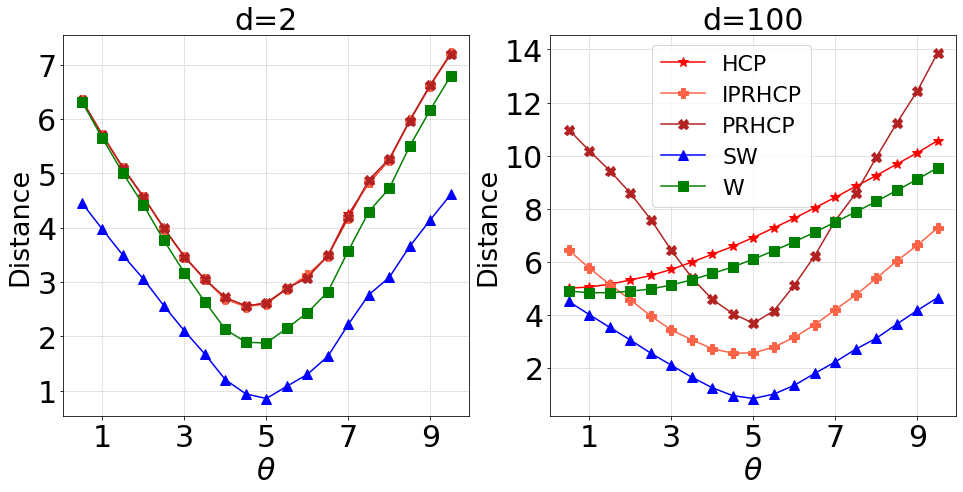

In [6]:
plt.figure(figsize=(16,7))
ss = 2
plot_lines = []
plt.subplot(1,2,1)
plt.plot(q,hcp,c='r',label='HCP',marker='*',markersize=10)
plt.plot(q,iprhcp,c='tomato',label='IPRHCP',marker='P',markersize=10)
plt.plot(q,prhcp,c='firebrick',label='PRHCP',marker='X',markersize=10)

plt.plot(q,sw,c='b',label='SW',marker='^',markersize=10)
plt.plot(q,w,c='g',label='W',marker='s',markersize=10)

plt.xlabel(r'$\theta$',fontsize=30)
plt.ylabel('Distance',fontsize=27)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks([1,3,5,7,9],fontsize=30)
plt.yticks(fontsize=30)
plt.title('d=2',fontsize=30)


plt.subplot(1,2,2)

l1, = plt.plot(q,(hcp2)/10,c='r',label='HCP',marker='*',markersize=10)
l2, = plt.plot(q,iprhcp2,c='tomato',label='IPRHCP',marker='P',markersize=10)
l3, = plt.plot(q,prhcp2,c='firebrick',label='PRHCP',marker='X',markersize=10)

l4, = plt.plot(q,sw2,c='b',label='SW',marker='^',markersize=10)
l5, = plt.plot(q,(w2)/10,c='g',label='W',marker='s',markersize=10)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_lines.append(l1)
plot_lines.append(l2)
plot_lines.append(l3)

plot_lines.append(l4)
plot_lines.append(l5)


plt.xlabel(r'$\theta$',fontsize=30)
plt.ylabel('Distance',fontsize=27)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xticks([1,3,5,7,9],fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=3, bbox_to_anchor=(0.25,0.55),borderaxespad = 0., fontsize=22)
plt.title('d=100',fontsize=30)

# plt.savefig("./iprhcp1.pdf", format="pdf", bbox_inches="tight")


# Convergence rate

In [8]:
N = [500,1000,2000,4000,8000]
lN = np.log10(np.array(N))
R = 10

In [12]:
L = len(N)

prhcp = np.zeros(L)
vprhcp = np.zeros(L)

iprhcp = np.zeros(L)
viprhcp = np.zeros(L)

sw = np.zeros(L)
vsw = np.zeros(L)

hcp = np.zeros(L)
vrhcp = np.zeros(L)

w = np.zeros(L)
vw = np.zeros(L)
 
np.random.seed(1)

for i in range(L):
    n = N[i]
    a = np.ones(n)/n
    b = np.ones(n)/n
    temp1 = np.zeros(R)
    temp2 = np.zeros(R)
    temp3 = np.zeros(R)
    temp4 = np.zeros(R)
    temp5 = np.zeros(R)

    for r in range(R):

        X = np.random.randn(n,d1)
        Y = np.random.randn(n,d1)

        temp1[r] = PRHCP(X,Y)[1]
        temp2[r] = IPRHCP(X,Y,nslice=10)

        M = ot.dist(X,Y)
        temp3[r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        temp4[r] = HCP(X,Y)
        temp5[r] = np.sqrt(ot.emd2(a,b,M))

    prhcp[i] = np.mean(temp1)
    iprhcp[i] = np.mean(temp2)
    sw[i] = np.mean(temp3)
    hcp[i] = np.mean(temp4)
    w[i] = np.mean(temp5)

In [13]:
L = len(N)
d2 = 20

prhcp2 = np.zeros(L)
vprhcp2 = np.zeros(L)

iprhcp2 = np.zeros(L)
viprhcp22 = np.zeros(L)

sw2 = np.zeros(L)
vsw2 = np.zeros(L)

hcp2 = np.zeros(L)
vrhcp2 = np.zeros(L)

w2 = np.zeros(L)
vw2 = np.zeros(L)
 
np.random.seed(1)

for i in range(L):
    n = N[i]
    a = np.ones(n)/n
    b = np.ones(n)/n
    temp1 = np.zeros(R)
    temp2 = np.zeros(R)
    temp3 = np.zeros(R)
    temp4 = np.zeros(R)
    temp5 = np.zeros(R)

    for r in range(R):

        X = np.random.randn(n,d2)
        Y = np.random.randn(n,d2)

        temp1[r] = PRHCP(X,Y)[1]
        temp2[r] = IPRHCP(X,Y,nslice=10)

        M = ot.dist(X,Y)
        temp3[r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        temp4[r] = HCP(X,Y)
        temp5[r] = np.sqrt(ot.emd2(a,b,M))

    prhcp2[i] = np.mean(temp1)
    iprhcp2[i] = np.mean(temp2)
    sw2[i] = np.mean(temp3)
    hcp2[i] = np.mean(temp4)
    w2[i] = np.mean(temp5)

Text(0.5, 1.0, 'd=20')

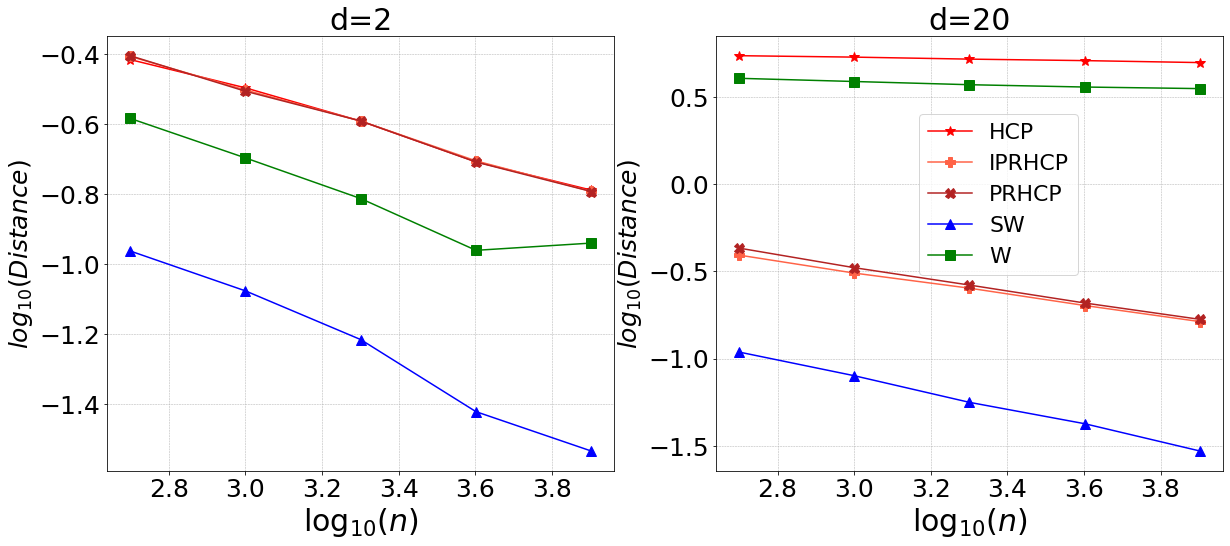

In [11]:
plt.figure(figsize=(20,8))
ss = 2
plot_lines = []
plt.subplot(1,2,1)
plt.plot(lN,np.log10(hcp),c='r',label='HCP',marker='*',markersize=10)
plt.plot(lN,np.log10(iprhcp),c='tomato',label='IPRHCP',marker='P',markersize=10)
plt.plot(lN,np.log10(prhcp),c='firebrick',label='PRHCP',marker='X',markersize=10)

plt.plot(lN,np.log10(sw),c='b',label='SW',marker='^',markersize=10)
plt.plot(lN,np.log10(w),c='g',label='W',marker='s',markersize=10)

plt.xlabel(r'$\log_{10}(n)$',fontsize=30)
plt.ylabel(r'$log_{10}(Distance)$',fontsize=25)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('d=2',fontsize=30)



plt.subplot(1,2,2)

l1, = plt.plot(lN,np.log10(hcp2),c='r',label='HCP',marker='*',markersize=10)
l2, = plt.plot(lN,np.log10(iprhcp2),c='tomato',label='IPRHCP',marker='P',markersize=10)
l3, = plt.plot(lN,np.log10(prhcp2),c='firebrick',label='PRHCP',marker='X',markersize=10)

l4, = plt.plot(lN,np.log10(sw2),c='b',label='SW',marker='^',markersize=10)
l5, = plt.plot(lN,np.log10(w2),c='g',label='W',marker='s',markersize=10)

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plot_lines.append(l1)
plot_lines.append(l2)
plot_lines.append(l3)

plot_lines.append(l4)
plot_lines.append(l5)


plt.xlabel(r'$\log_{10}(n)$',fontsize=30)
plt.ylabel(r'$log_{10}(Distance)$',fontsize=25)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=0, bbox_to_anchor=(0.4,0.45),borderaxespad = 0., fontsize=22)
plt.title('d=20',fontsize=30)
# plt.savefig("./iprhcp2.pdf", format="pdf", bbox_inches="tight")